# Лабораторная работа 2

Годовые доходы и расходы филлипинских семей

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from kneed import KneeLocator
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn.model_selection import *
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

### Подготовка данных

In [55]:
pd.set_option('display.max_columns', None)
dfInit = pd.read_csv('./data/mushrooms.csv', delimiter=',', encoding='utf8')
df = dfInit.copy(deep=True)
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


#### Преобразование параметров

In [56]:
def updateData(fieldName):
    dataDf = list(set(df[fieldName].map(lambda elem: elem)))

    cnt = 0
    dataDict = {}
    for shape in dataDf:
        if shape not in dataDict.keys():
            dataDict[shape] = cnt
            cnt += 1
    print(dataDict)

    df[fieldName] = df[fieldName].map(lambda elem: dataDict[elem])

##### ядовитость

edible=e (съедобный), poisonous=p (ядовитый)

In [57]:
classDict = {'e': 0, 'p': 1} 
df['class'] = df['class'].map(lambda elem: classDict[elem])

##### форма шляпки 

bell(колокол)=b

conical(конический)=c

convex(выпуклый)=x

flat(плоский)=f

knobbed(бугристый)=k

sunken(впалый)=s

In [58]:
updateData('cap-shape')

{'s': 0, 'x': 1, 'f': 2, 'b': 3, 'c': 4, 'k': 5}


##### поверхность шляпки

fibrous(волокнистый)=f

grooves(в ямках)=g

scaly(чешуйчатый)=y

smooth(гладкий)=s

In [59]:
updateData('cap-surface')

{'s': 0, 'y': 1, 'g': 2, 'f': 3}


##### цвет шляпки

brown=n

buff(бурый)=b

cinnamon(коричневый)=c

gray=g

green=r

pink=p

purple=u

red=e

white=w

yellow=y

In [60]:
updateData('cap-color')

{'u': 0, 'y': 1, 'w': 2, 'r': 3, 'e': 4, 'b': 5, 'n': 6, 'c': 7, 'p': 8, 'g': 9}


##### появляются ли синие пятна

In [61]:
updateData('bruises')

{'t': 0, 'f': 1}


##### запах

almond(миндальный)=a

anise(анис)=l

creosote(креозот)=c

fishy(рыбный)=y

foul(неприятный)=f

musty(затхлый)=m

none=n

pungent(острый)=p

spicy(пряный)=s

In [62]:
updateData('odor')

{'s': 0, 'y': 1, 'l': 2, 'f': 3, 'a': 4, 'n': 5, 'c': 6, 'm': 7, 'p': 8}


##### шляпка с обратной стороны

attached(прикрепленный)=a

descending(убывающий)=d

free=f

notched(с надрезом)=n

In [63]:
updateData('gill-attachment')

{'f': 0, 'a': 1}


##### цвет обратной стороны шляпки

black=k

brown=n

buff(бурый)=b

chocolate=h

gray=g

green=r

orange=o

pink=p

purple=u

red=e

white=w

yellow=y

In [64]:
updateData('gill-color')

{'u': 0, 'w': 1, 'y': 2, 'r': 3, 'o': 4, 'e': 5, 'b': 6, 'n': 7, 'h': 8, 'k': 9, 'p': 10, 'g': 11}


##### форма ножки

enlarging(расширяющаяся)=e

tapering(сужающаяся)=t

In [65]:
updateData('stalk-shape')

{'t': 0, 'e': 1}


##### поверхность стебля над/под кольцом

fibrous(волокнистый)=f

scaly(чешуйчатый)=y

silky(шелковистый)=k

smooth(гладкий)=s

In [66]:
updateData('stalk-surface-above-ring')

{'y': 0, 's': 1, 'k': 2, 'f': 3}


In [67]:
updateData('stalk-surface-below-ring')

{'k': 0, 's': 1, 'y': 2, 'f': 3}


##### цвет поверхности стебля над/под кольцом

brown=n

buff(бурый)=b

cinnamon(коричневый)=c

gray=g

orange=o

pink=p

red=e

white=w

yellow=y

In [68]:
updateData('stalk-color-above-ring')

{'o': 0, 'w': 1, 'y': 2, 'e': 3, 'b': 4, 'n': 5, 'c': 6, 'p': 7, 'g': 8}


In [69]:
updateData('stalk-color-below-ring')

{'o': 0, 'w': 1, 'y': 2, 'e': 3, 'b': 4, 'n': 5, 'c': 6, 'p': 7, 'g': 8}


##### форма кольца

cobwebby(паутинное строение)=c

evanescent(еле заметная)=e

flaring=f

large=l

none=n

pendant(подвесная)=p

sheathing=s

zone=z

In [70]:
updateData('ring-type')

{'f': 0, 'l': 1, 'e': 2, 'n': 3, 'p': 4}


##### цвет спор

black=k

brown=n

buff=b

chocolate=h

green=r

orange=o

purple=u

white=w

yellow=y

In [71]:
updateData('spore-print-color')

{'u': 0, 'w': 1, 'o': 2, 'r': 3, 'y': 4, 'b': 5, 'n': 6, 'h': 7, 'k': 8}


##### популяция

abundant(обильный)=a

clustered(сгриппированный)=c

numerous=n

scattered(рассеянный)=s

several=v

solitary=y

In [72]:
updateData('population')

{'s': 0, 'y': 1, 'a': 2, 'n': 3, 'c': 4, 'v': 5}


##### средаобитания

grasses=g

leaves=l

meadows(луг)=m

paths(тропинка)=p

urban=u

waste=w

woods=d

In [73]:
updateData('habitat')

{'u': 0, 'w': 1, 'l': 2, 'd': 3, 'm': 4, 'p': 5, 'g': 6}


In [74]:
del df['gill-spacing']
del df['gill-size']
del df['stalk-root']
del df['veil-type']
del df['veil-color']
del df['ring-number']


In [75]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-color,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-type,spore-print-color,population,habitat
0,1,1,0,6,0,8,0,9,1,1,1,1,1,4,8,0,0
1,0,1,0,1,0,4,0,9,1,1,1,1,1,4,6,3,6
2,0,3,0,2,0,2,0,7,1,1,1,1,1,4,6,3,4
3,1,1,1,2,0,8,0,7,1,1,1,1,1,4,8,0,0
4,0,1,0,9,1,5,0,9,0,1,1,1,1,2,6,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,5,0,6,1,5,1,2,1,1,1,0,0,4,5,4,2
8120,0,1,0,6,1,5,1,2,1,1,1,0,0,4,5,5,2
8121,0,2,0,6,1,5,1,7,1,1,1,0,0,4,5,4,2
8122,1,5,1,6,1,1,0,6,0,1,0,1,1,2,1,5,2


In [76]:
# df = pd.DataFrame(data=StandardScaler().fit_transform(df), columns=df.columns)

<AxesSubplot:>

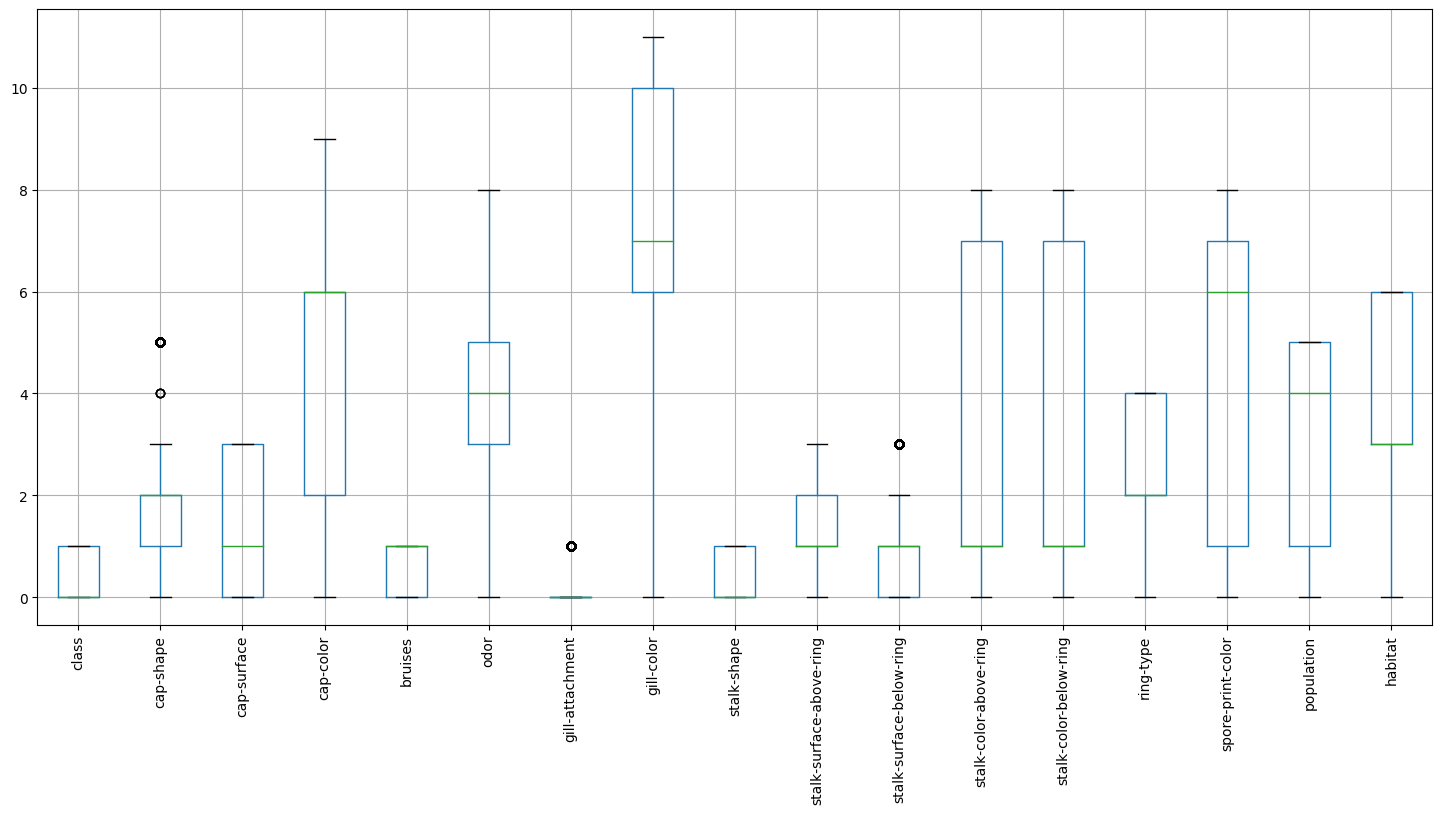

In [77]:
ax = df.boxplot(column=list(df.columns),figsize=(18,8))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax

In [78]:
x = df.drop(['class'], axis=1)
y = df['class']

In [79]:
scaler = StandardScaler()
scaler.fit(x)
scaledFeatures = scaler.transform(x)

scaledDf = pd.DataFrame(scaledFeatures, columns = x.columns)

#### Разделение на обучающие и тестовые данные

In [80]:
xTraining, xTest, yTraining, yTest = train_test_split(scaledDf, y, test_size = 0.3, random_state=42)

In [81]:
labelEncoder = preprocessing.LabelEncoder()
yTrainingEncoded = labelEncoder.fit_transform(yTraining)

### k-ближайших соседей

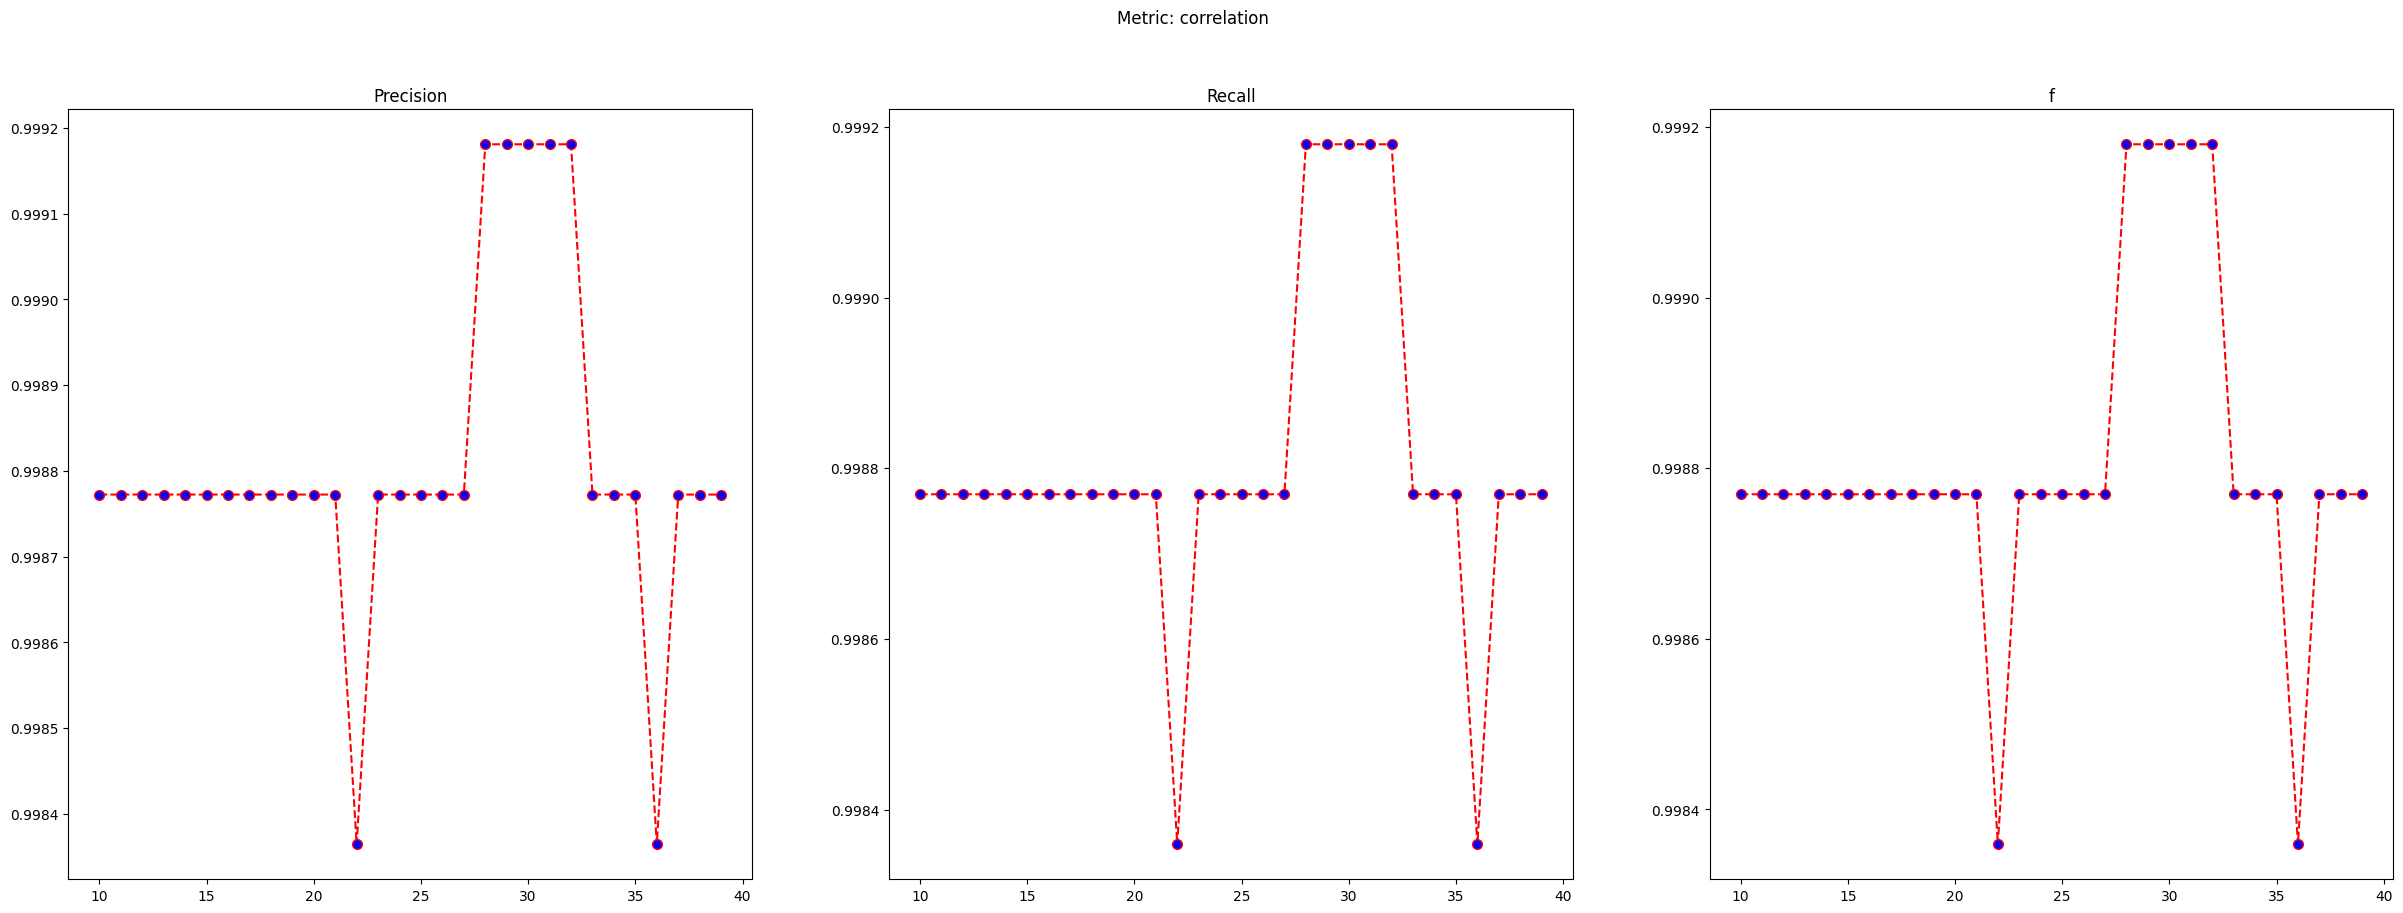

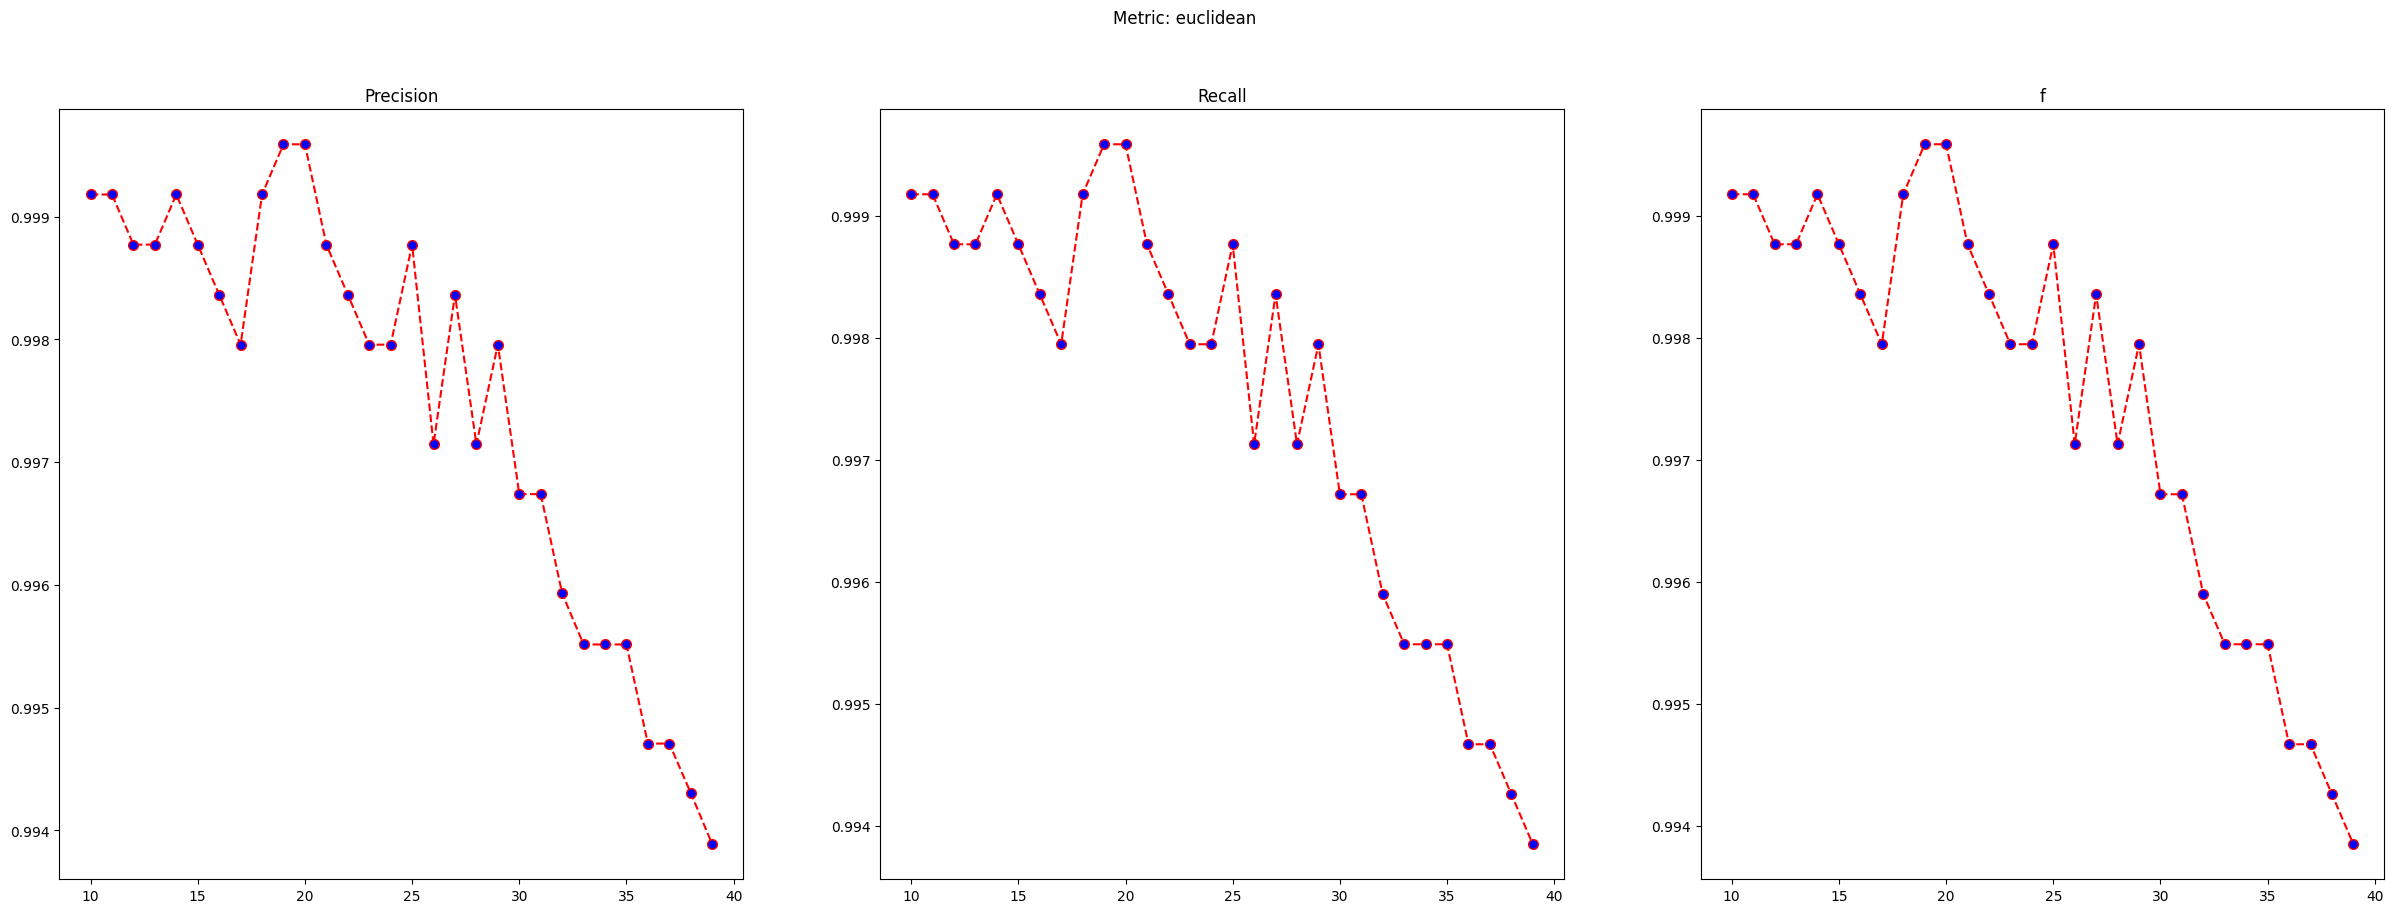

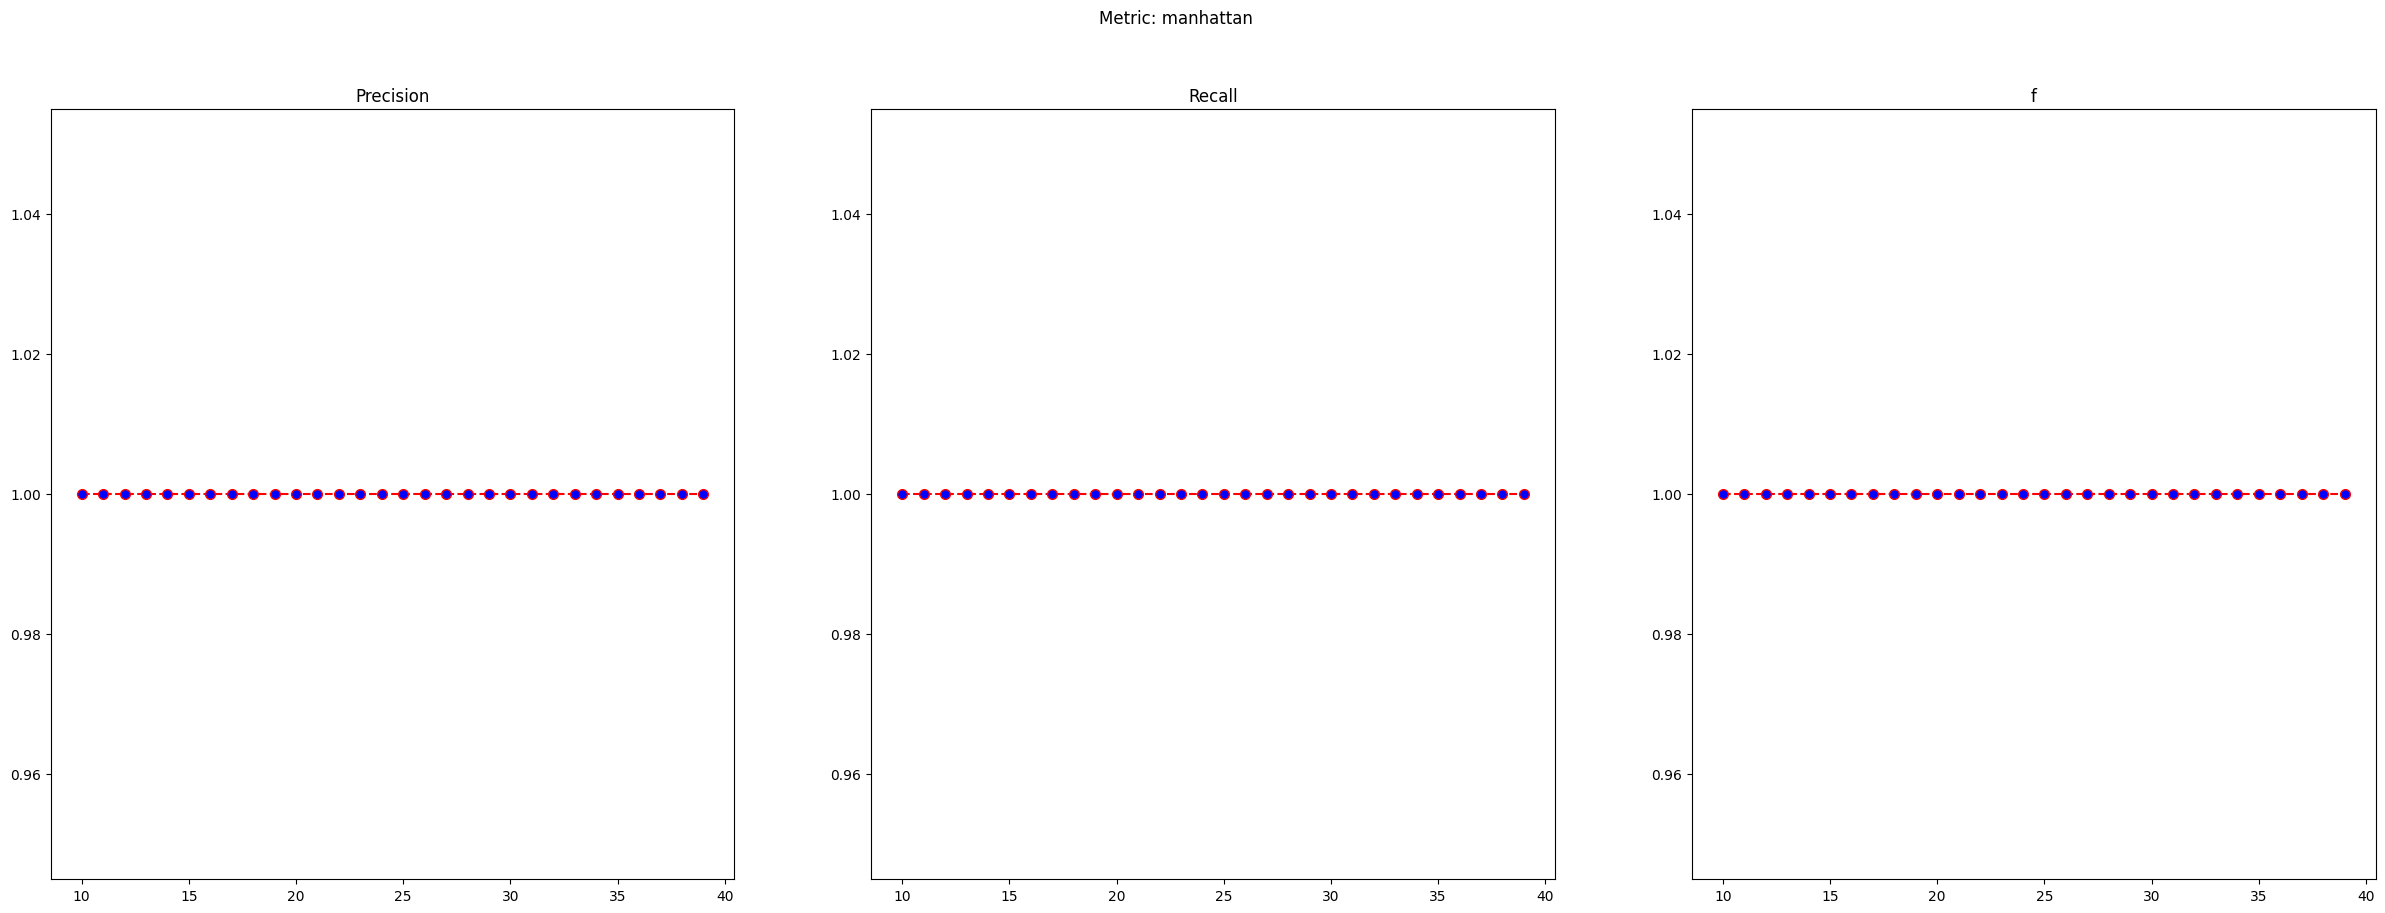

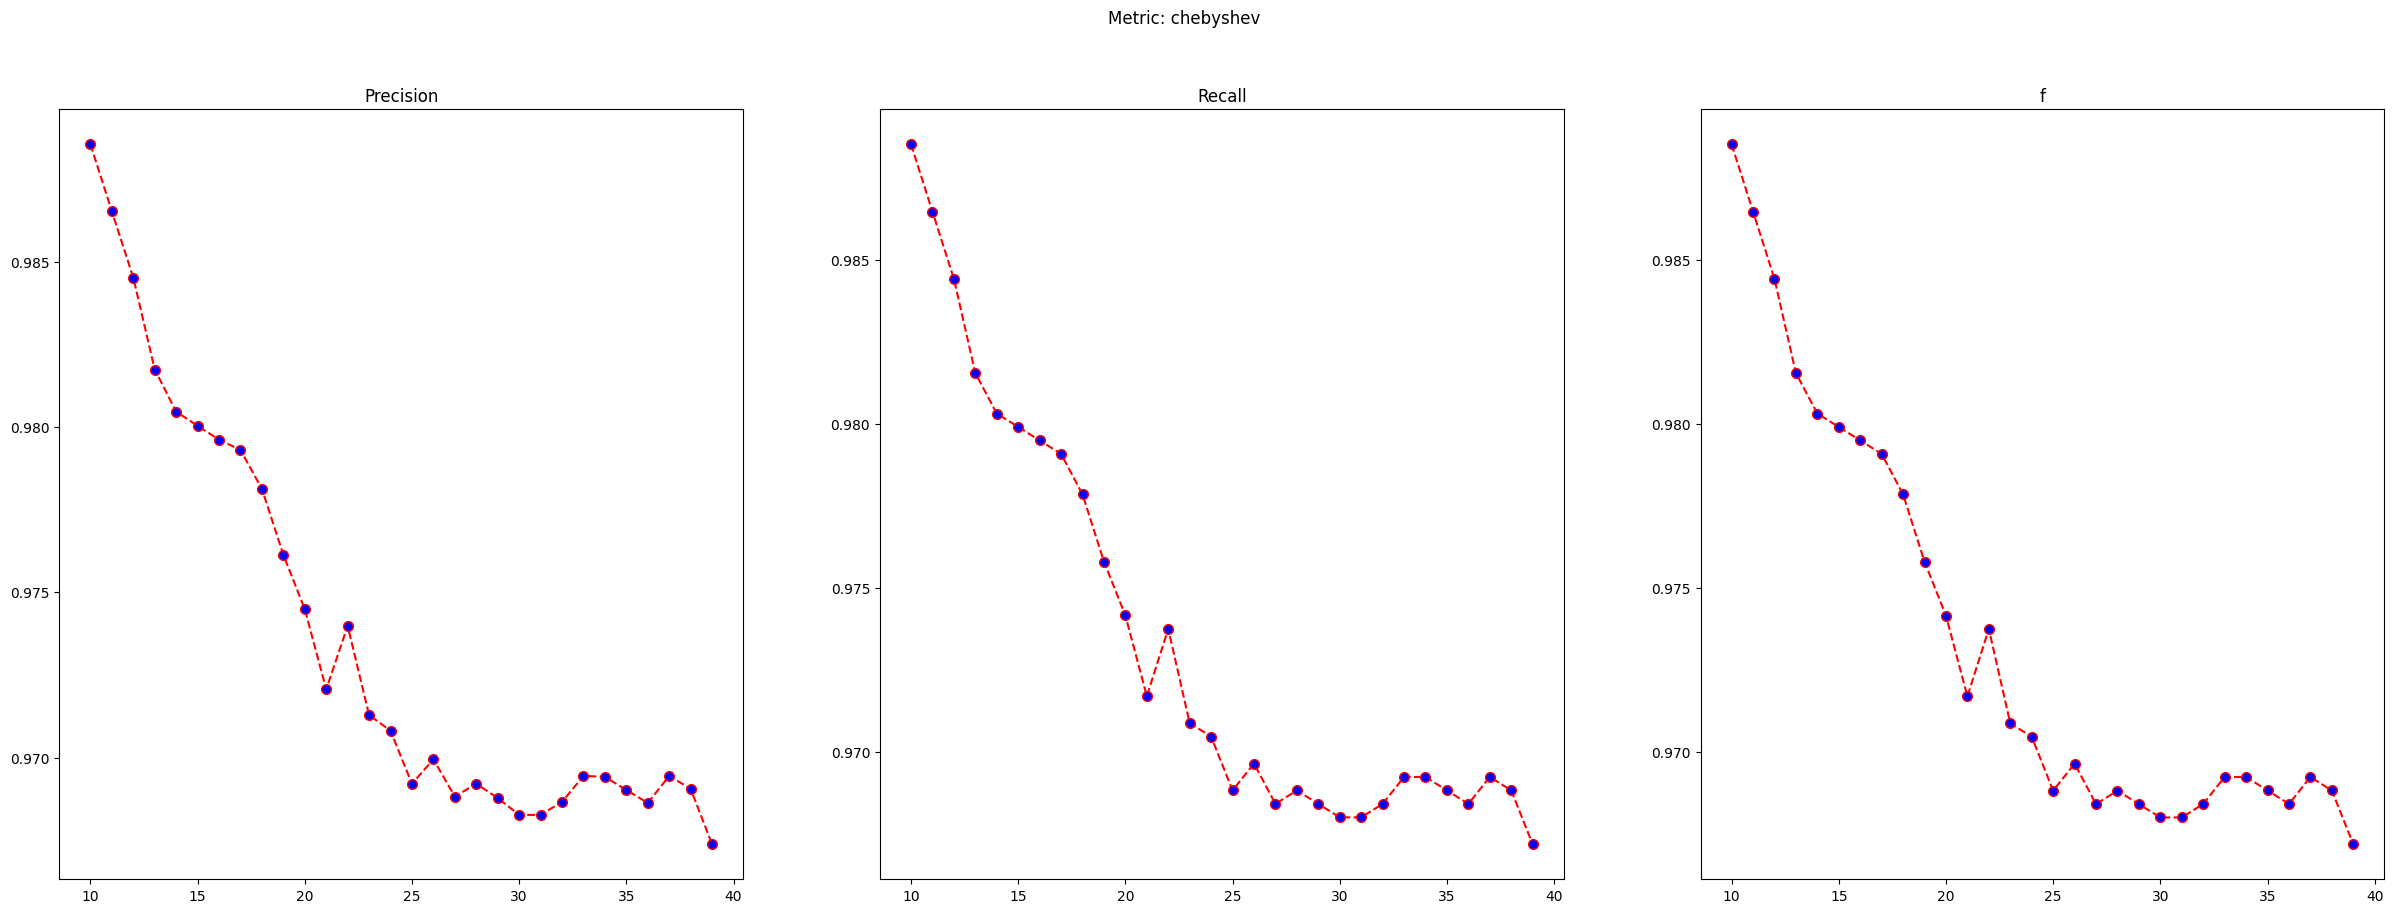

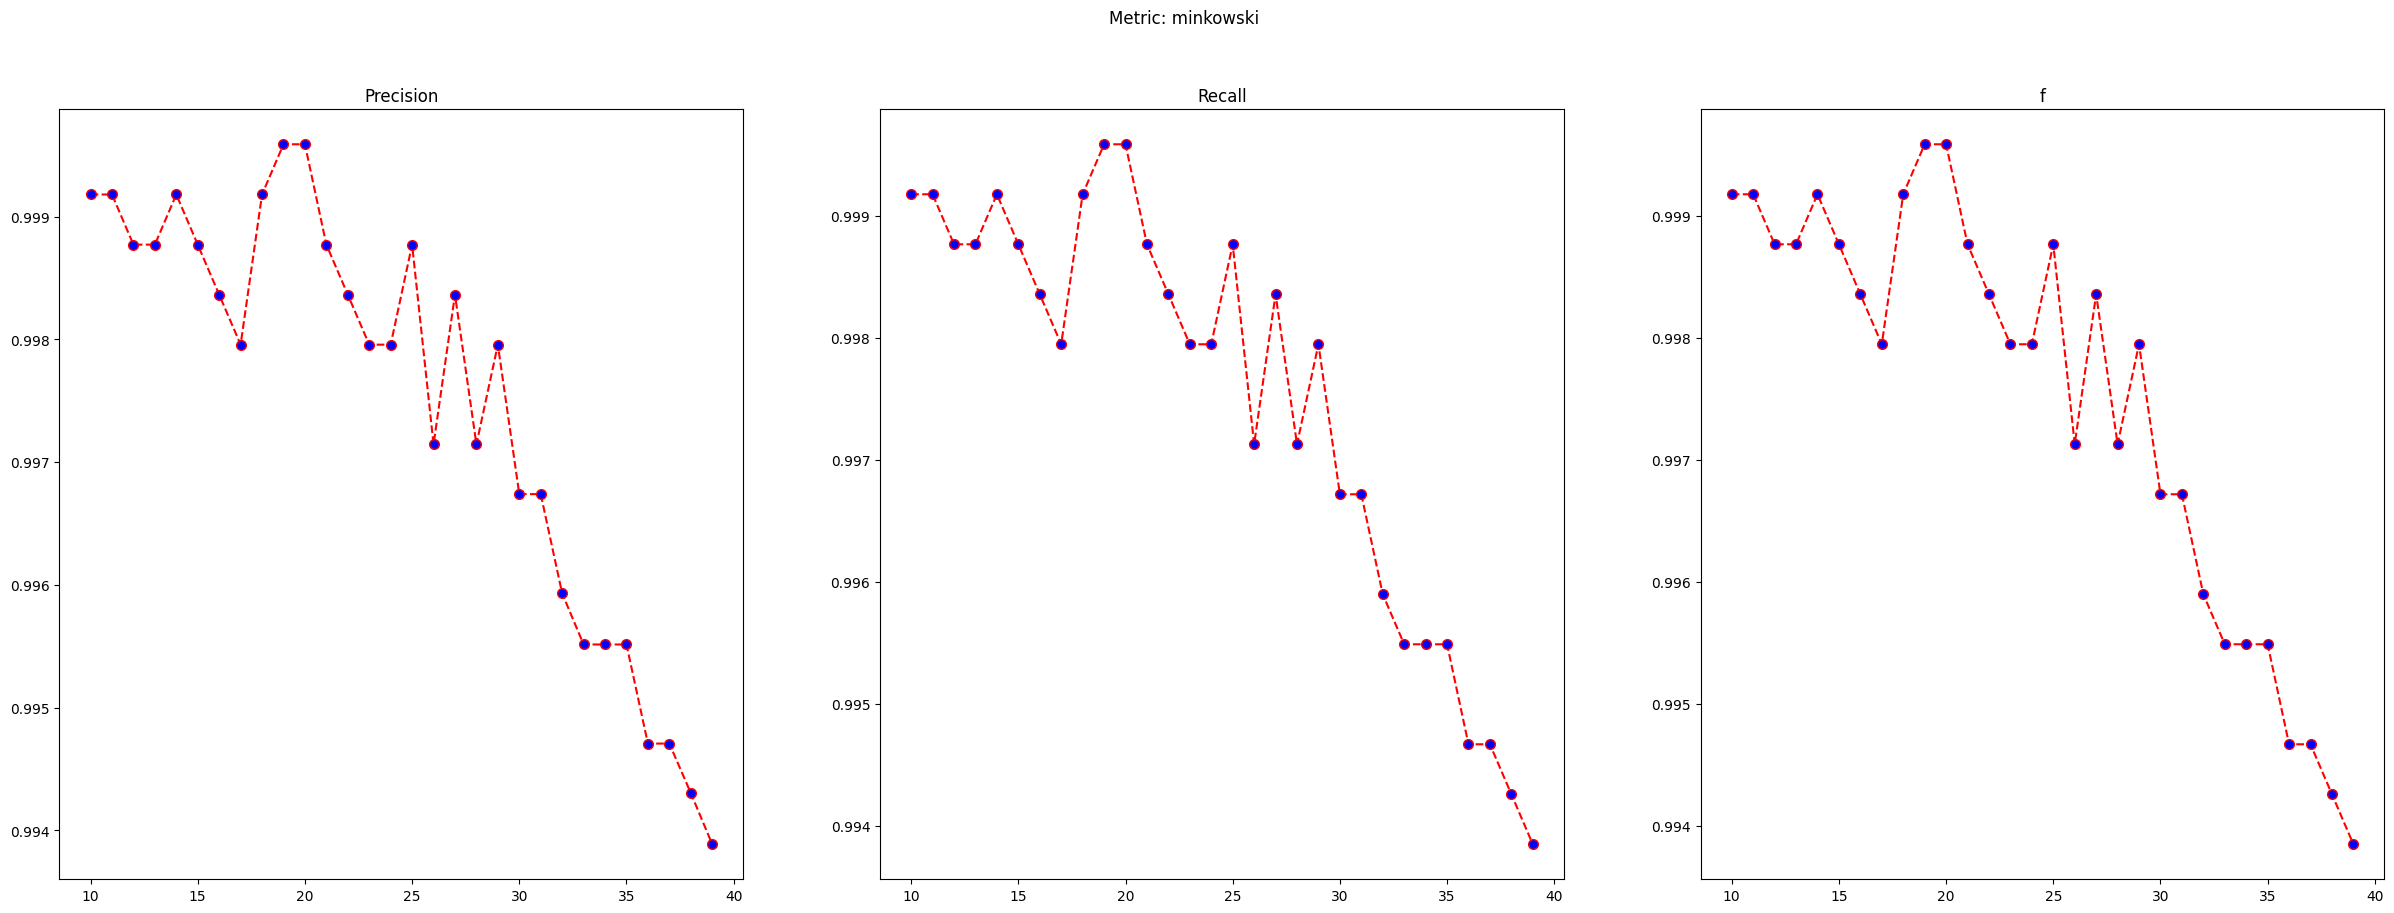

In [82]:
def doKNeightbors(m):
    precisionArr = []
    recallArr = []
    fArr = []

    neighborsRange = range(10, 40, 1)

    for i in neighborsRange:
        knn = KNeighborsClassifier(n_neighbors=i, weights='distance', metric=m)
        knn.fit(xTraining, yTraining)
        predict = knn.predict(xTest).tolist()

        metricsData = precision_recall_fscore_support(yTest, predict, average='weighted')

        precisionArr.append(np.average(metricsData[0]))
        recallArr.append(np.average(metricsData[1]))
        fArr.append(np.average(metricsData[2]))

    fig, ax = plt.subplots(1, 3, figsize=(30, 10))
    ax[0].plot(neighborsRange, precisionArr, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=7)
    ax[1].plot(neighborsRange, recallArr, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=7)
    ax[2].plot(neighborsRange, fArr, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=7)

    ax[0].set_title("Precision")
    ax[1].set_title("Recall")
    ax[2].set_title("f")

    fig.suptitle("Metric: " + m)

for m in ["correlation", "euclidean", "manhattan", "chebyshev", "minkowski"]:
    doKNeightbors(m)

<AxesSubplot:>

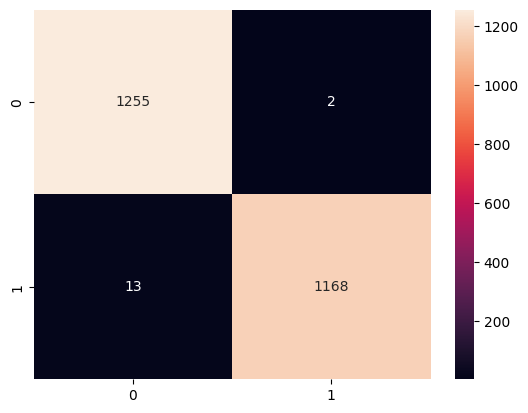

In [83]:
classes_names = ['0','1']

knn = KNeighborsClassifier(n_neighbors=39, weights='distance', metric='minkowski')
knn.fit(xTraining, yTraining)
predictions = knn.predict(xTest).tolist()

cm = pd.DataFrame(confusion_matrix(yTest, predictions), columns=classes_names, index = classes_names)
                  
sns.heatmap(cm, annot=True, fmt='d')

In [84]:
print(classification_report(yTest, predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1257
           1       1.00      0.99      0.99      1181

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438



### Деревья принятия решений

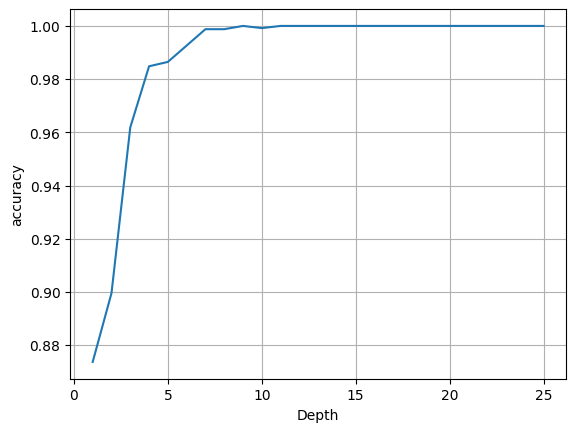

Max deep:  9
f1:  1.0
Recall:  1.0
Precision:  1.0


c:\Users\bryan\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


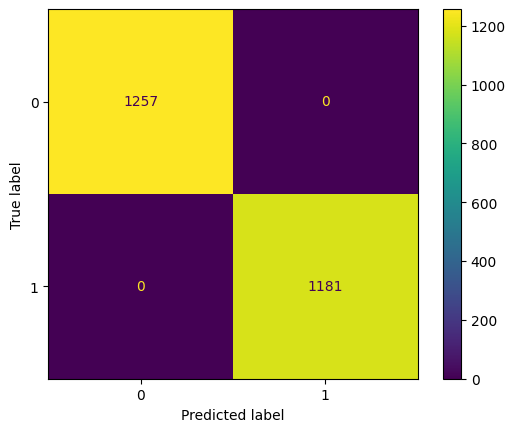

In [85]:
pltx = []
plty = []

for depth in range(1, 26):
    model = RandomForestClassifier(max_depth = depth).fit(xTraining, yTraining)
    predictions = model.predict(xTest)
    plty.append(accuracy_score(yTest, predictions))
    pltx.append(depth)

plt.plot(pltx, plty)
plt.xlabel('Depth')
plt.ylabel('accuracy')
plt.grid()
plt.show()

maxDepth = pltx[plty.index(max(plty))]
pl = plot_confusion_matrix(model, xTest, yTest)  

print("Max deep: ", maxDepth)
print("f1: ", f1_score(yTest, predictions, average='weighted'))
print("Recall: ", recall_score(yTest, predictions, average='weighted'))
print("Precision: ", precision_score(yTest, predictions, average='weighted'))

In [86]:
model = RandomForestClassifier()
print(cross_val_score(model, xTraining, yTraining, cv=5))

[1. 1. 1. 1. 1.]
